<a href="https://colab.research.google.com/github/fadhilhamdi/Pembelajaran-Mesin_Muhammad-Fadhil-Hamdi_2211533018/blob/main/backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
file_path = 'framingham.csv'
df = pd.read_csv(file_path)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Mengatasi nilai yang hilang dengan mengimputasi menggunakan mean
df.fillna(df.mean(), inplace=True)

Kode yang Anda berikan merupakan pendekatan untuk memisahkan fitur (X) dan label (y) dari sebuah dataframe (df). Pendekatan ini dilakukan dengan mempertimbangkan bahwa kolom target ('target') mungkin ada di dalam dataframe atau mungkin tidak.

In [ ]:
# Memisahkan fitur dan label
if 'target' in df.columns:
    X = df.drop(columns=['target'])
    y = df['target']
else:
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

untuk standarisasi fitur-fitur (X) menggunakan StandardScaler dari library scikit-learn. Mari kita bahas lebih detail apa yang dilakukan oleh kode ini:
Tujuannya adalah untuk mengubah distribusi nilai dari setiap fitur sehingga

*   Tujuannya adalah untuk mengubah distribusi nilai dari setiap fitur sehingga memiliki rata-rata 0 dan varians 1. Ini membantu algoritma machine learning yang sensitif terhadap skala atau ukuran fitur-fitur untuk konvergensi yang lebih baik dan hasil yang lebih baik secara umum.


In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Fungsi sigmoid dan turunannya (atau lebih umum, fungsi aktivasi dan turunannya) penting dalam jaringan saraf karena mereka menambahkan kemampuan non-linear ke lapisan-lapisan jaringan. Tanpa non-linearitas, jaringan saraf hanya akan berperilaku seperti model linier yang tidak dapat menangkap pola yang kompleks dalam data.

In [ ]:
# Fungsi aktivasi dan turunan (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [ ]:
# Inisialisasi jaringan saraf
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1

np.random.seed(42)
W1 = np.random.uniform(size=(input_dim, hidden_dim))
b1 = np.random.uniform(size=(1, hidden_dim))
W2 = np.random.uniform(size=(hidden_dim, output_dim))
b2 = np.random.uniform(size=(1, output_dim))

  # Cetak loss sesekali untuk memantau pelatihan
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {mse}')

Variabel learning_rate dan epochs sangat penting dalam menentukan bagaimana jaringan saraf Anda akan belajar dari data selama proses pelatihan. Pemilihan nilai yang tepat untuk kedua parameter ini dapat mempengaruhi performa dan konvergensi dari model yang Anda kembangkan.







In [ ]:
# Learning rate
learning_rate = 0.1
epochs = 10000

In [ ]:
# Untuk menyimpan loss setiap epoch
losses = []

1. Setiap iterasi (epoch) dalam loop ini mencakup dua langkah utama: forward pass dan backward pass.
2. Forward pass mengacu pada proses di mana input diberikan kepada jaringan, dan aktivasi melalui berbagai lapisan (di sini, dua lapisan: pertama dan kedua) menghasilkan output yang akhirnya digunakan untuk menghasilkan prediksi atau nilai loss.
3. Langkah ini penting untuk membangun pemahaman tentang bagaimana input mengalir melalui jaringan dan bagaimana aktivasi dihitung di setiap lapisan.

In [ ]:
# Iterasi untuk pelatihan
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

1. Langkah-langkah ini penting dalam proses pelatihan jaringan saraf karena membantu kita memahami seberapa baik model memprediksi nilai berdasarkan data latih.
2. Dengan melacak dan memantau nilai loss (MSE) selama iterasi pelatihan, kita dapat mengevaluasi dan membandingkan performa model di setiap epoch dan memastikan bahwa model bergerak menuju konvergensi yang baik.

In [ ]:
    # Hitung loss (Mean Squared Error)
    loss = y_train.values.reshape(-1, 1) - output
    mse = np.mean(np.square(loss))
    losses.append(mse)

In [ ]:
    # Backward pass
    d_output = loss * sigmoid_derivative(output)
    d_hidden_layer = d_output.dot(W2.T) * sigmoid_derivative(a1)

1. Memperbarui bobot dan bias berdasarkan gradien yang dihitung memungkinkan model untuk belajar dari data latih dan mengoptimalkan prediksi pada data yang belum pernah dilihat sebelumnya.
2. Dengan menggunakan learning rate, kita mengatur kecepatan konvergensi model agar tidak terlalu cepat sehingga melompati minimum global atau terlalu lambat sehingga memerlukan waktu lama untuk mencapai konvergensi.
3. Dengan menggunakan langkah-langkah ini, jaringan saraf Anda dapat belajar secara bertahap dan meningkatkan kemampuan prediksi pada tugas yang diberikan.

In [ ]:
    #Perbarui bobot dan bias
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X_train.T.dot(d_hidden_layer) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate


In [ ]:
    # Cetak loss sesekali untuk memantau pelatihan
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {mse}')

In [ ]:
# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

In [ ]:
# Prediksi pada data test
z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
output_test = sigmoid(z2_test)

In [ ]:
# Konversi output prediksi menjadi 0 atau 1
predictions = (output_test > 0.5).astype(int)

In [ ]:
# Hitung akurasi
accuracy = np.mean(predictions == y_test.values.reshape(-1, 1))
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.38%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
file_path = 'framingham.csv'
df = pd.read_csv(file_path)

# Mengatasi nilai yang hilang dengan mengimputasi menggunakan mean
df.fillna(df.mean(), inplace=True)

# Memisahkan fitur dan label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Debug output untuk memastikan data di-load dengan benar
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (3390, 15)
y_train shape: (3390,)
X_test shape: (848, 15)
y_test shape: (848,)


Epoch 0, Loss: 0.6952231498379573
Epoch 1000, Loss: 0.15339233025154347
Epoch 2000, Loss: 0.15339233025153826
Epoch 3000, Loss: 0.15339233025153307
Epoch 4000, Loss: 0.1533923302515279
Epoch 5000, Loss: 0.1533923302515227
Epoch 6000, Loss: 0.1533923302515175
Epoch 7000, Loss: 0.15339233025151228
Epoch 8000, Loss: 0.15339233025150711
Epoch 9000, Loss: 0.15339233025150195


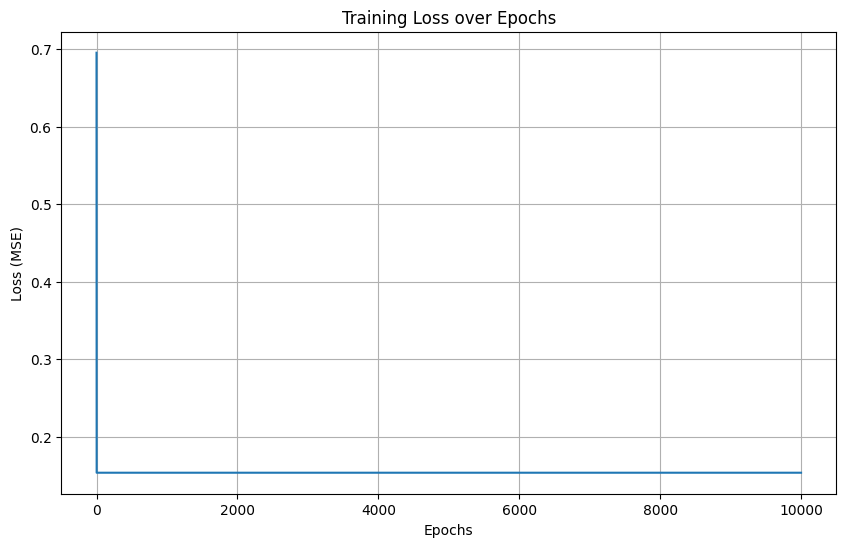

Final training loss: 0.1533923302514967
Accuracy: 85.38%


In [ ]:
# Fungsi aktivasi dan turunan (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Inisialisasi jaringan saraf
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1

np.random.seed(42)
W1 = np.random.uniform(size=(input_dim, hidden_dim))
b1 = np.random.uniform(size=(1, hidden_dim))
W2 = np.random.uniform(size=(hidden_dim, output_dim))
b2 = np.random.uniform(size=(1, output_dim))

# Learning rate
learning_rate = 0.1
epochs = 10000

# Untuk menyimpan loss setiap epoch
losses = []

# Iterasi untuk pelatihan
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

    # Hitung loss (Mean Squared Error)
    loss = y_train.values.reshape(-1, 1) - output
    mse = np.mean(np.square(loss))
    losses.append(mse)

    # Backward pass
    d_output = loss * sigmoid_derivative(output)
    d_hidden_layer = d_output.dot(W2.T) * sigmoid_derivative(a1)

    # Perbarui bobot dan bias
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X_train.T.dot(d_hidden_layer) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Cetak loss sesekali untuk memantau pelatihan
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {mse}')

# Visualisasi loss selama pelatihan
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

# Debug output untuk memastikan training berjalan dengan benar
print(f'Final training loss: {losses[-1]}')

# Prediksi pada data test
z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
output_test = sigmoid(z2_test)

# Konversi output prediksi menjadi 0 atau 1
predictions = (output_test > 0.5).astype(int)

# Hitung akurasi
accuracy = np.mean(predictions == y_test.values.reshape(-1, 1))
print(f'Accuracy: {accuracy * 100:.2f}%')


1. Jika grafik loss menunjukkan penurunan yang stabil dan berangsur-angsur menuju nol atau nilai yang sangat kecil, ini menunjukkan bahwa model sedang belajar dengan baik.
2. Jika grafik menunjukkan fluktuasi besar atau bahkan peningkatan loss, ini bisa menjadi indikasi bahwa learning rate mungkin terlalu besar, atau bahwa model memerlukan penyesuaian lebih lanjut.
3. Pada akhir grafik, kita melihat nilai final dari loss, yang memberikan gambaran tentang seberapa baik model telah dilatih pada data latih.

1. Grafik menunjukkan bagaimana nilai loss berubah selama iterasi (epochs) dari 0 hingga jumlah epochs yang ditentukan (di sini, 10,000 epochs).
2. sumbu x (horizontal) menunjukkan epochs, sedangkan sumbu y (vertikal) menunjukkan nilai loss (MSE) pada setiap epoch.
3. Tujuan dari grafik ini adalah untuk memantau penurunan loss seiring berjalannya pelatihan. Idealnya, kita ingin melihat loss berkurang seiring dengan meningkatnya epochs, yang menunjukkan bahwa model semakin mempelajari pola dari data latih.